Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Crash_Location',
       'Alternate_Route'],
      dtype='object')
Column 'Vehicles' does not exist in the DataFrame.
Features and labels separated successfully.
Accuracy: 1.00
Classification Report:
               precision    recall  f1-sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


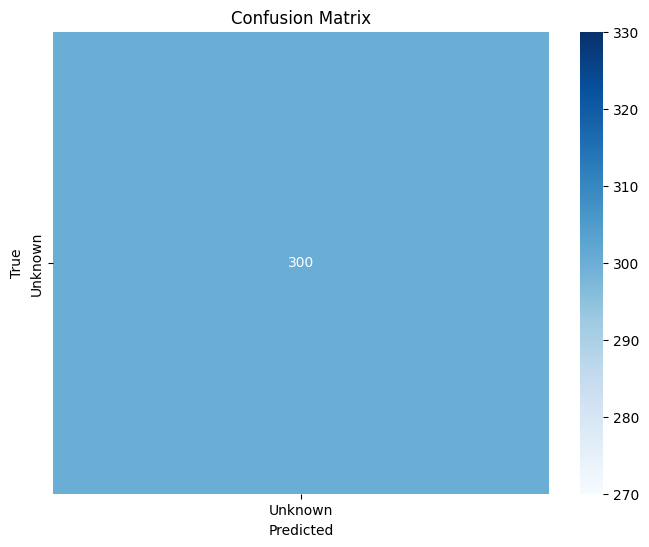

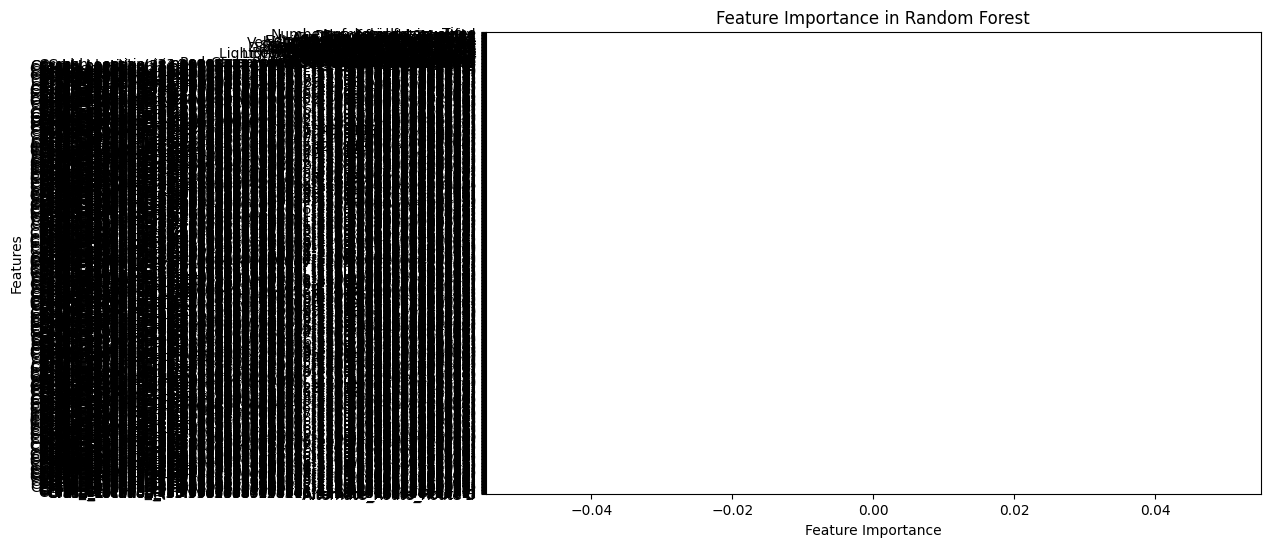

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/traffic_collision_data_with_routes.csv")  # Replace with your file path

# Check the column names in the data to understand its structure
print(data.columns)

# If 'Vehicles' column exists, define the risk calculation function
if 'Vehicles' in data.columns:
    def calculate_risk(vehicles):
        if vehicles > 12:
            return "High"
        elif 8 <= vehicles <= 12:
            return "Medium"
        else:
            return "Low"
    data['Risk_Level'] = data['Vehicles'].apply(calculate_risk)
    print("Risk_Level column created.")
else:
    print("Column 'Vehicles' does not exist in the DataFrame.")
    data['Risk_Level'] = "Unknown"  # Assign a default value if 'Vehicles' is not present

# Feature and label selection
if "Risk_Level" in data.columns:
    features = data.drop(columns=["Risk_Level"])  # Drop the label column
    labels = data["Risk_Level"]  # Assign the label
    print("Features and labels separated successfully.")
else:
    print("Column 'Risk_Level' not found in DataFrame.")
    # If no 'Risk_Level' column, create a simple label (e.g., based on some existing logic)
    data['Risk_Level'] = "Unknown"
    features = data.drop(columns=["Risk_Level"])  # Keep features excluding 'Risk_Level'
    labels = data["Risk_Level"]  # Default label

# Convert categorical columns to numerical using one-hot encoding
categorical_columns = features.select_dtypes(include=['object']).columns  # Find categorical columns

# Apply one-hot encoding to categorical columns
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, labels, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")  # Display accuracy

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()  # This will display the confusion matrix plot

# Feature importance
importances = model.feature_importances_
feature_names = features_encoded.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()  # This will display the feature importance plot
